*Page and Latex Commands*
$\newcommand{\C}{\mathbb{C}}
\renewcommand{\R}{\mathbb{R}}
\renewcommand{\Z}{\mathbb{Z}}
\renewcommand{\N}{\mathbb{N}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\mP}{\mathcal{P}}
\newcommand{\bp}{\begin{pmatrix}}
\newcommand{\ep}{\end{pmatrix}}
$

In [6]:
from jupyterthemes import jtplot
jtplot.style()

import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import sys

# Self Defined Functions
sys.path.append('..\lib')

from findiff import *
from opt import *
from krot import *

# Known Solutions

## 2D

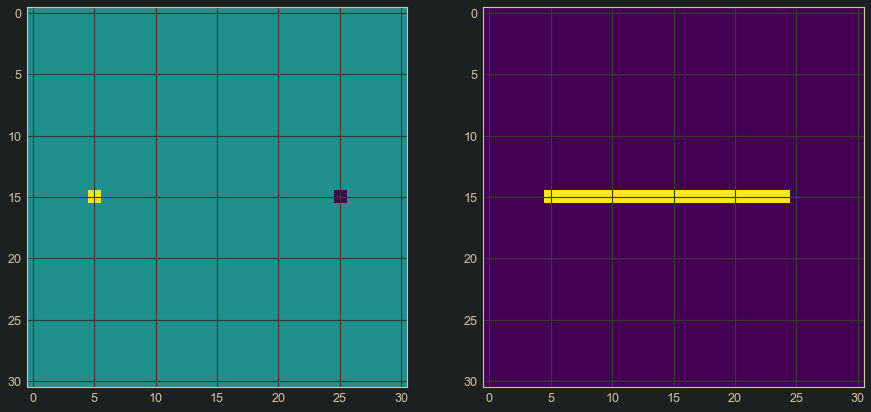

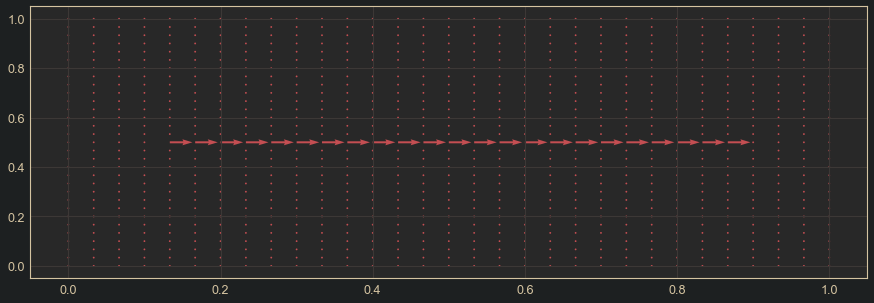

In [7]:
#GRID
n = m = 5*6+1
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[m//2,n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[m // 2,5*n // 6] = 1
f = sigma.flatten()-rho.flatten()

#VARIABLES
lam = np.zeros((n,m))
lam[m// 2, n//6:5*n//6] = np.ones(4*n//6)
Gc=np.ones((n,m))
Gphi = np.array([[0,0]*((m//2)*n + n//10+1)+[1,0]*(8*n//10-1)+[0,0]*((m//2)*n+n//10+1)]).reshape(n*m,2).T

#DIFFERENCE OPERATORS
Dx = D2xFE(n,m, BC,matrix=True)
Dy = D2yFE(n,m, BC,matrix=True)
Div = np.vstack((Dx.T, Dy.T))
Grad = np.array([Dx,Dy])

#PLOTTING
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(rho[::-1]-sigma[::-1])
plt.subplot(122)
plt.imshow(lam[::-1])
plt.figure(figsize=(15,5))
plt.quiver(xx,yy,Gphi[0],Gphi[1],color='r', scale=n+n//5)

### Two Step

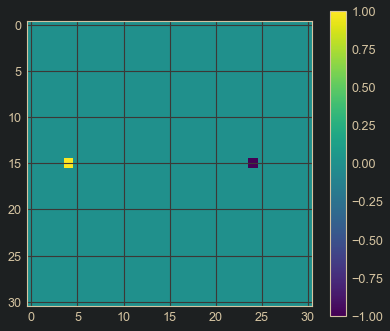

In [8]:
lam_diag = np.diag(list(lam.flatten())*2)
sol = Div.T@lam_diag@Gphi.flatten()
plt.imshow(sol.reshape(n,m))
plt.colorbar()

## FFT

In [ ]:
#GRID
n = m = 5*6+1
h=1/(n-1)
xx,yy = np.meshgrid(np.linspace(0,1,n),np.linspace(0,1,n))
BC = "Neumann"

#DISTRIBUTIONS
rho = np.zeros((n,n))
rho[m//2,n//6] = 1
# Final Distribution
sigma = np.zeros((n,n))
sigma[m // 2,5*n // 6] = 1
f = sigma.flatten()-rho.flatten()

#VARIABLES
lam = np.zeros((n,m))
lam[m// 2, n//6:5*n//6] = np.ones(4*n//6)
Gc=np.ones((n,m))
Gphi = np.array([[0,0]*((m//2)*n + n//10+1)+[1,0]*(8*n//10-1)+[0,0]*((m//2)*n+n//10+1)]).reshape(n*m,2).T

#DIFFERENCE OPERATORS
Dx = D2xFE(n,m, BC,matrix=True)
Dy = D2yFE(n,m, BC,matrix=True)
Div = np.vstack((Dx.T, Dy.T))
Grad = np.array([Dx,Dy])

#PLOTTING
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(rho[::-1]-sigma[::-1])
plt.subplot(122)
plt.imshow(lam[::-1])
plt.figure(figsize=(15,5))
plt.quiver(xx,yy,Gphi[0],Gphi[1],color='r', scale=n+n//5)

## Variable Poisson

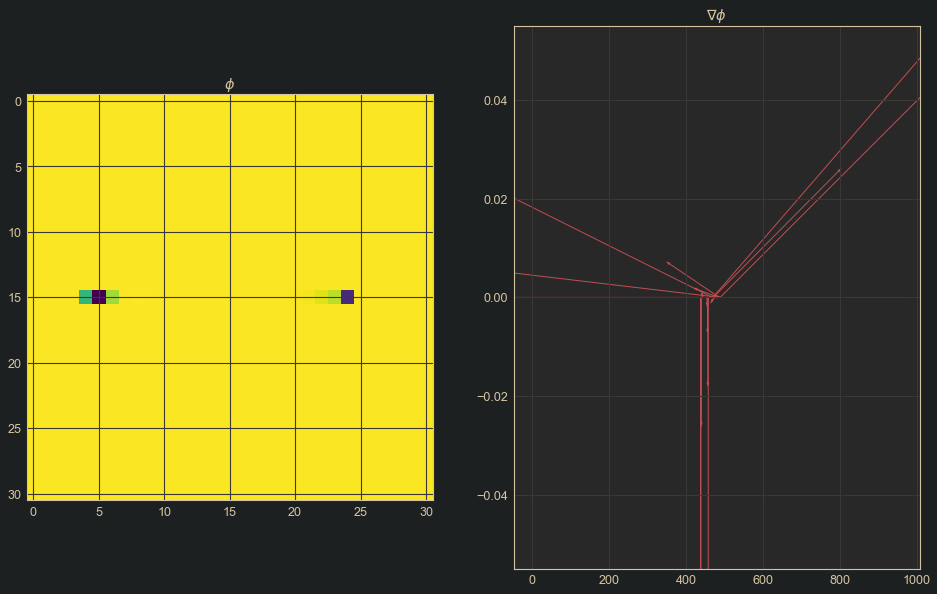

NameError: name 'norm' is not defined

In [9]:
#SINGLE STEP
f = sigma[1:-1,1:-1].flatten() - rho[1:-1,1:-1].flatten()
phi = cp.Variable((n-2)*(m-2))
P = VP2A(n-1,m-1,lam[1:,1:].flatten())
prob = cp.Problem(cp.Minimize(cp.sum_squares(P@phi+f)))
prob.solve()

#Extend PHI
phi = phi.value.reshape((n-2,m-2))
phi = np.vstack((phi[0,:],phi,phi[-1,:]))
phi = np.vstack((phi[:,0], phi.T, phi[:,-1])).T

Gphi = Grad@phi.flatten()

#PLOTTING
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title('$\\phi$')
plt.imshow(phi)
plt.subplot(122)
plt.title('$\\nabla\\phi$')
plt.quiver(Gphi[0], Gphi[1],color='r')
plt.show()

plt.imshow(norm.reshape((n,n)))
plt.colorbar()